#### Selecting a model with Cross-Validation
##### Fundamental question in machine learning : how do we select a model that predicts well?

In [1]:
from sklearn import datasets 

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target 

In [2]:
#train-test split 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=7)


In [3]:
#instantiating two nearest-neighbour 

from sklearn.neighbors import KNeighborsClassifier 

knn3 = KNeighborsClassifier(n_neighbors=3)
knn5 = KNeighborsClassifier(n_neighbors=5)

###### Now scoring both algorithms using `cross_val_score` 

In [4]:
from sklearn.model_selection import cross_val_score 

knn3_scores = cross_val_score(knn3, X_train, y_train, cv=4)
knn5_scores = cross_val_score(knn5, X_train, y_train, cv=4)

In [5]:
knn3_scores

array([0.96428571, 0.92857143, 0.89285714, 1.        ])

In [6]:
knn5_scores

array([0.96428571, 0.96428571, 0.92857143, 1.        ])

###### Getting $Mean$ of both list 

In [8]:
print("Mean of Knn_3: ",knn3_scores.mean())
print("Mean of Knn_5: ",knn5_scores.mean())

Mean of Knn_3:  0.9464285714285714
Mean of Knn_5:  0.9642857142857143


###### Getting $Standard Deviation$ of both list:

In [9]:
print("Standard Deviation of Knn_3: ", knn3_scores.std())
print("Standard Deviation of Knn_5: ", knn5_scores.std())

Standard Deviation of Knn_3:  0.039929785312496226
Standard Deviation of Knn_5:  0.025253813613805257


###### Knn_5 performed better and bit stable, therefore to be picked

#### K-Fold Cross Validation

In [10]:
#Working on demo dataset 

import numpy as np 
X = np.array([[1,2],[3,4],[5,6],[7,8],[1,2],[3,4],[5,6],[7,8]])
y = np.array([1,2,1,2,1,2,1,2])

In [11]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits=4)

In [12]:
#now iterating through the generator 

cc = 1 
for train_index, test_index in kf.split(X):
    print("Round: ",cc, "Training Indices: ",train_index, "Testing Indices: ",test_index)
    cc +=1

Round:  1 Training Indices:  [2 3 4 5 6 7] Testing Indices:  [0 1]
Round:  2 Training Indices:  [0 1 4 5 6 7] Testing Indices:  [2 3]
Round:  3 Training Indices:  [0 1 2 3 6 7] Testing Indices:  [4 5]
Round:  4 Training Indices:  [0 1 2 3 4 5] Testing Indices:  [6 7]


In [13]:
kf.get_n_splits()

4

In [16]:
#To view the data in the folds themselves, store the generator as list 
indices_list = list(kf.split(X))
indices_list[3]

(array([0, 1, 2, 3, 4, 5]), array([6, 7]))

In [18]:
train_indices, test_indices = indices_list[3]
X[train_indices]

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8],
       [1, 2],
       [3, 4]])

In [19]:
y[train_indices]

array([1, 2, 1, 2, 1, 2])

In [20]:
X[test_indices]

array([[5, 6],
       [7, 8]])

In [21]:
y[test_indices]

array([1, 2])

##### Balanced Cross-Validation
##### Using `stratified cross-validation` this way different sets will have different values for the target

In [22]:
from sklearn.model_selection import StratifiedKFold 
skf = StratifiedKFold(n_splits=4)

In [24]:

cc = 1 
for train_index, test_index in skf.split(X,y):
    print("Round: ",cc, "Training Indices: ",train_index, "Testing Indices: ",test_index)
    cc +=1

Round:  1 Training Indices:  [2 3 4 5 6 7] Testing Indices:  [0 1]
Round:  2 Training Indices:  [0 1 4 5 6 7] Testing Indices:  [2 3]
Round:  3 Training Indices:  [0 1 2 3 6 7] Testing Indices:  [4 5]
Round:  4 Training Indices:  [0 1 2 3 4 5] Testing Indices:  [6 7]


##### `stratefied K-Fold` takes two arguement $X$ and $y$. It tries to distribtue the target $y$ with the same distribution in each of the fold sets

##### `StratifiedShuffleSplit` reshuffle the stratified fold

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit 
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.25)

In [26]:

cc = 1 
for train_index, test_index in sss.split(X,y):
    print("Round: ",cc, "Training Indices: ",train_index, "Testing Indices: ",test_index)
    cc +=1

Round:  1 Training Indices:  [0 3 4 2 5 1] Testing Indices:  [6 7]
Round:  2 Training Indices:  [5 3 4 2 0 1] Testing Indices:  [7 6]
Round:  3 Training Indices:  [4 5 6 1 0 7] Testing Indices:  [2 3]
Round:  4 Training Indices:  [5 2 3 0 4 7] Testing Indices:  [6 1]
Round:  5 Training Indices:  [3 5 7 6 4 2] Testing Indices:  [0 1]


##### Cross-Validation with ShuffleSplit

Text(0.5, 1.0, 'Histogram of Dataset')

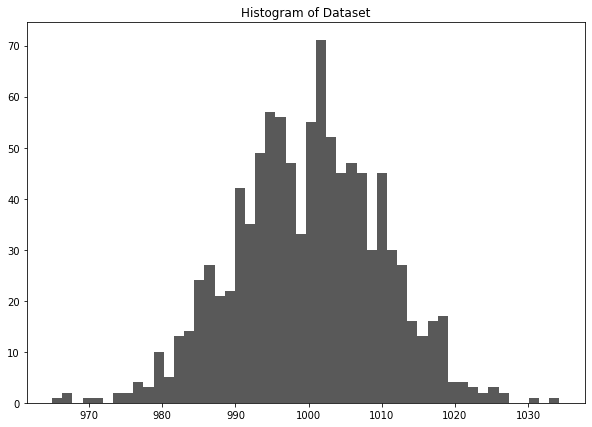

In [27]:
import matplotlib.pyplot as plt 
%matplotlib inline 

true_mean = 1000 
true_std = 10 
N = 1000 
dataset = np.random.normal(loc=true_mean, scale=true_std, size=N)

fig, ax = plt.subplots(figsize=(10,7))
ax.hist(dataset, color='k',alpha=.65, histtype='stepfilled',bins=50)
ax.set_title("Histogram of Dataset")

###### Estimating the mean of half of the dataset 

In [33]:
holdout_set = dataset[:500]
fitting_set = dataset[500:]
estimate = fitting_set[:500].mean()
estimate

1000.2102346526106

In [34]:
#Mean of the whole dataset 
data_mean = dataset.mean()
data_mean

999.9317680110954

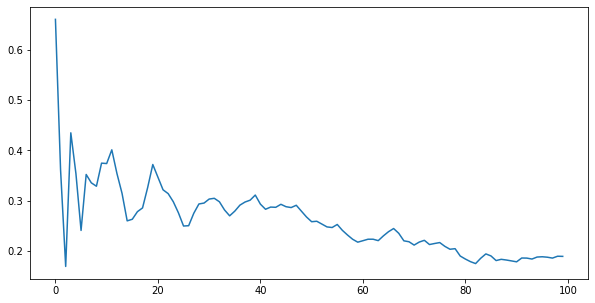

In [35]:
#Visualizing the behaviour of ShuffleSplit 

from sklearn.model_selection import ShuffleSplit 
shuffle_split = ShuffleSplit(n_splits=100, test_size=.5,random_state=0)

mean_p = []
estimate_closeness = []

for train_index, not_used_index in shuffle_split.split(fitting_set):
    mean_p.append(fitting_set[train_index].mean())
    shuf_estimate = np.mean(mean_p)
    estimate_closeness.append(np.abs(shuf_estimate - data_mean))

plt.figure(figsize=(10,5))
plt.plot(estimate_closeness)